In [1]:
# import modules
from pydblite.sqlite import Database, Table
import matplotlib.pylab as plt
from matplotlib import rcParams
import urllib3
import numpy as np


In [14]:
def loadremote_mplrc(url = ''):
    http = urllib3.PoolManager()
    response = http.request('GET', url)
    P={}
    for line in response.data.splitlines():
        l=line.decode('utf-8')
        if not l.startswith("#") and not l.startswith(" ") and l:
            a=l.split(":")
            if len(a) == 2:
                try:
                    ## remove inline comments
                    b = a[1].split("#")
                    P[a[0].strip()]=b[0].strip()
                except:
                    P[a[0].strip()]=a[1].strip()

    #print(P)                
    rcParams.update(P)

In [15]:
# Custom .matplotlibrc
matplotlibrc_url = 'https://tinyurl.com/y6g5r5lk'
loadremote_mplrc(url = matplotlibrc_url)

In [4]:
mldb = Database("../../Data/mlpack.db")
dataset = Table("dataset",mldb)

### 1. Inspect the dataset 


In [5]:
dataset.field_info


{'a': {'type': 'FLOAT', 'NOT NULL': True, 'DEFAULT': None},
 'b': {'type': 'FLOAT', 'NOT NULL': True, 'DEFAULT': None},
 'c': {'type': 'FLOAT', 'NOT NULL': True, 'DEFAULT': None}}

### 2. Preview the dataset

In [6]:
[r for r in dataset][:5]

[{'__id__': 1, 'a': 1.1473823886461334, 'b': 0.02648743211679966, 'c': 4.0},
 {'__id__': 2, 'a': 0.10089323542829873, 'b': 0.882746190832952, 'c': 3.0},
 {'__id__': 3, 'a': -0.041286564091623595, 'b': 0.4004518246793048, 'c': 0.0},
 {'__id__': 4, 'a': 0.6577404364762345, 'b': -0.3854316399997564, 'c': 4.0},
 {'__id__': 5, 'a': -0.05394204585235289, 'b': 0.2685674383264389, 'c': 2.0}]

### 3. Numerical distribution

In [7]:
x1_4=[r['a'] for r in dataset(c=4.0)]
x2_4=[r['b'] for r in dataset(c=4.0)]
x1_2=[r['a'] for r in dataset(c=2.0)]
x2_2=[r['b'] for r in dataset(c=2.0)]

In [8]:
type(x1_2)

list

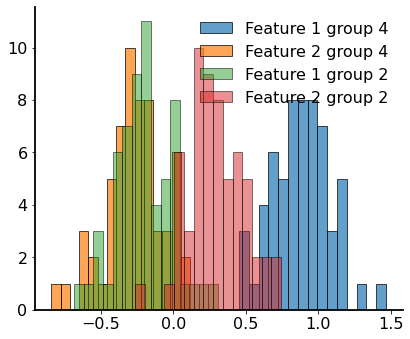

In [9]:
figure = plt.figure()
figure.tight_layout()
bins=15
plt.hist(x1_4,bins=bins,edgecolor='black',label="Feature 1 group 4",alpha=0.7);
plt.hist(x2_4,bins=bins,edgecolor='black',label="Feature 2 group 4",alpha=0.7);
plt.hist(x1_2,bins=bins,edgecolor='black',label="Feature 1 group 2",alpha=0.5);
plt.hist(x2_2,bins=bins,edgecolor='black',label="Feature 2 group 2",alpha=0.5);
ax = figure.gca()
ax.legend()

### 4. Features Scatterplot

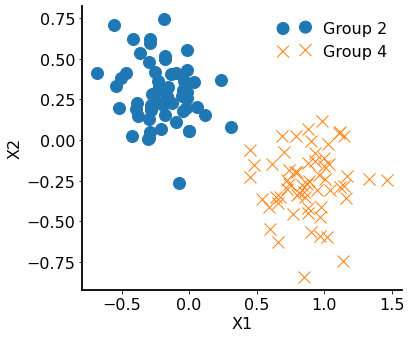

In [10]:
figure = plt.figure()
figure.tight_layout()
plt.scatter(x1_2,x2_2,marker="o",label="Group 2")
plt.scatter(x1_4,x2_4,marker="x",label="Group 4")
ax = figure.gca()
ax.set_xlabel("X1")
ax.set_ylabel("X2");
ax.legend()


### 5. Correlation Matrix

In [11]:
np.corrcoef(x1_2,x2_2)

array([[ 1.        , -0.20530199],
       [-0.20530199,  1.        ]])